In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
df = pd.read_pickle('df_all_features.pkl')

In [3]:
df.columns

Index(['dtime', 'sales', 'price', 'sales_smpy', 'num_accounts', 'permit_total',
       'avg_dew_humidity_pct', 'avg_wind_speed_mph', 'temp_deviation',
       'HDD_CDD', 'personal_income', 'real_gdp', 'consumer_spending',
       'population', 'person_per_account', 'hum_wind', 'hum_temp',
       'wind_temp'],
      dtype='object')

In [4]:
df = df[['sales', 'price', 'sales_smpy', 'num_accounts',
       'avg_dew_humidity_pct', 'avg_wind_speed_mph', 'temp_deviation',
       'HDD_CDD', 'hum_wind', 'hum_temp', 'wind_temp']]

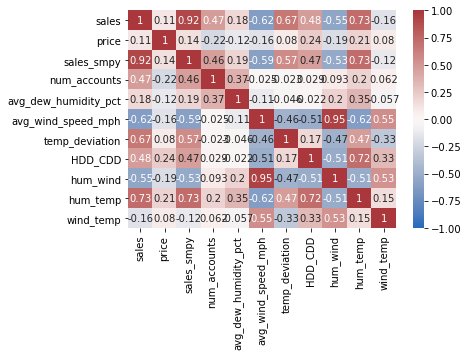

In [5]:
sns.heatmap(df.corr(), cmap='vlag', annot=True, vmin=-1, vmax=1);

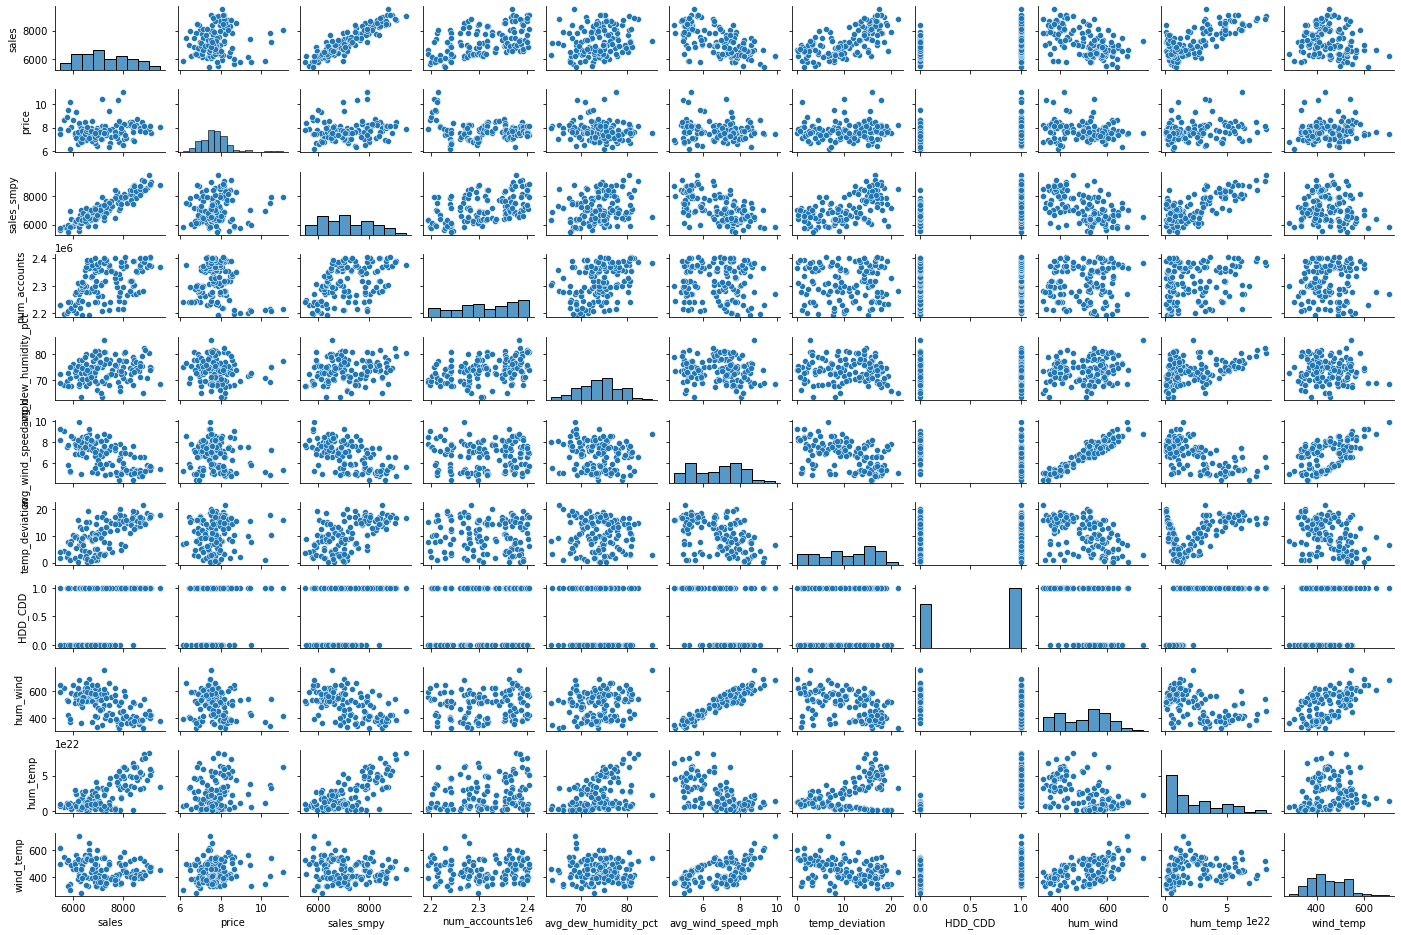

In [6]:
sns.pairplot(df, height=1.2, aspect=1.5);

In [7]:
selected_features = df[['price', 'sales_smpy', 'num_accounts',
       'avg_dew_humidity_pct', 'avg_wind_speed_mph', 'temp_deviation',
       'HDD_CDD', 'hum_wind', 'hum_temp', 'wind_temp']]
selected_features

,price,sales_smpy,num_accounts,avg_dew_humidity_pct,avg_wind_speed_mph,temp_deviation,HDD_CDD,hum_wind,hum_temp,wind_temp
0,7.86,6320,2195097,70.291034,7.846897,15.106897,0,551.566476,1.860556e+21,391.506021
1,7.88,6341,2195066,69.325352,8.550000,7.764789,0,592.731761,3.902404e+21,489.361056
2,8.66,5794,2197717,68.307285,9.088742,4.431126,0,620.827269,5.015326e+21,550.494854
3,8.94,5737,2200910,69.818667,7.596667,2.212667,1,530.389138,1.067913e+22,510.592224
4,9.35,6082,2201846,71.646667,7.518000,10.014667,1,538.639640,2.410200e+22,563.960264
...,...,...,...,...,...,...,...,...,...,...
128,7.62,8430,2400894,81.647143,5.265000,14.407857,1,429.872207,7.427229e+22,418.082368
129,7.33,7934,2404131,80.922297,6.945946,6.270946,1,562.081903,3.680310e+22,495.044138
130,7.55,7068,2401511,81.157447,7.121277,8.759574,0,577.944627,9.041945e+21,400.503626
131,7.57,7344,2400112,80.674468,7.639007,11.066667,0,616.272834,6.785162e+21,411.997116


In [8]:
X = selected_features

y = df["sales"]

In [9]:
#Split the data 80-20 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=15)

In [10]:
std = StandardScaler()
std.fit(X_train.values)
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)
lasso_model = LassoCV(cv=5, max_iter = 1000000)
X_train_model = lasso_model.fit(X_tr, y_train)
X_train_model.score(X_tr, y_train)

0.9151348105810009

In [11]:
lasso_model.alpha_

14.039715638024688

In [12]:
coef = list(zip(X_train.columns, lasso_model.coef_))
coef

[('price', 10.8858800637961),
 ('sales_smpy', 501.54756263664996),
 ('num_accounts', 195.83633606131468),
 ('avg_dew_humidity_pct', -0.0),
 ('avg_wind_speed_mph', -62.17456357733574),
 ('temp_deviation', 281.8639259263725),
 ('HDD_CDD', 34.133798412334954),
 ('hum_wind', -6.688859445563681),
 ('hum_temp', 53.46806389765599),
 ('wind_temp', -0.0)]

In [13]:
coef_df = pd.DataFrame(coef, columns=["feature", "coefficient"])
coef_df.round(5)

,feature,coefficient
0,price,10.88588
1,sales_smpy,501.54756
2,num_accounts,195.83634
3,avg_dew_humidity_pct,-0.00000
4,avg_wind_speed_mph,-62.17456
5,temp_deviation,281.86393
6,HDD_CDD,34.13380
7,hum_wind,-6.68886
8,hum_temp,53.46806
9,wind_temp,-0.00000


In [14]:
test_set_pred = lasso_model.predict(X_te)

In [15]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

In [16]:
mae(y_test, test_set_pred)

243.30541862051544

In [17]:
r2_score(y_test, test_set_pred)

0.8920399761477239

In [18]:
df_X_tr = pd.DataFrame(X_tr, columns=selected_features.columns)
df_y_tr = pd.DataFrame(y_train, columns=["sales"]).reset_index()
del df_y_tr["index"]
df_res = df_y_tr.join(df_X_tr)
df_res['res'] = abs(X_train_model.predict(df_X_tr[selected_features.columns])-df_res["sales"])
df_res

,sales,price,sales_smpy,num_accounts,avg_dew_humidity_pct,avg_wind_speed_mph,temp_deviation,HDD_CDD,hum_wind,hum_temp,wind_temp,res
0,7174,-0.996632,0.091839,-0.823167,-0.948371,-0.083624,1.150329,-1.187051,-0.346896,-1.132022,-1.681295,193.386593
1,6031,1.097948,-1.384461,-1.639261,0.543702,1.213436,-0.009939,-1.187051,1.407943,-0.944229,0.062014,49.553385
2,8386,0.209338,1.033676,-0.671253,0.610463,-1.051940,1.255969,0.842424,-0.897386,1.997826,-0.064833,173.075757
3,6563,0.285505,-0.646878,1.288901,-0.792532,1.183144,-1.564614,-1.187051,0.900499,-0.795925,0.979232,27.083122
4,7004,0.006227,-0.246314,0.674230,1.710910,-0.093894,0.008345,-1.187051,0.401271,-0.832072,-1.134809,187.736226
...,...,...,...,...,...,...,...,...,...,...,...,...
101,6983,-1.694826,0.324461,-1.176650,-1.201999,-0.649113,1.140385,0.842424,-0.943321,0.431005,0.439704,613.423640
102,7068,-0.184189,-0.158939,1.219411,0.708559,-0.668741,-1.247497,-1.187051,-0.478588,-0.633933,-1.115118,29.503956
103,7312,-0.260356,0.593395,0.585659,-0.692109,1.052864,0.975305,-1.187051,0.811860,-1.114914,-0.670348,464.025614
104,8879,-0.209578,1.455800,1.415956,1.850127,-1.178321,0.684775,0.842424,-0.749384,2.514550,-0.457096,176.672318


In [19]:
df_res.sort_values(['res']).tail(10)

,sales,price,sales_smpy,num_accounts,avg_dew_humidity_pct,avg_wind_speed_mph,temp_deviation,HDD_CDD,hum_wind,hum_temp,wind_temp,res
80,6315,-1.072799,-0.152130,-0.486841,0.180549,0.774694,-0.576829,-1.187051,0.837308,-0.878267,-0.014287,460.517760
103,7312,-0.260356,0.593395,0.585659,-0.692109,1.052864,0.975305,-1.187051,0.811860,-1.114914,-0.670348,464.025614
40,7336,-0.298439,0.107726,1.335168,-0.628113,-0.677381,0.498254,0.842424,-0.824736,0.318998,0.124991,472.808635
88,8276,0.501310,1.140341,-0.528936,-0.919333,0.031770,0.131198,0.842424,-0.229848,-0.037082,0.867233,476.207842
97,8152,0.602866,0.393681,-0.725962,-0.948889,-1.256155,0.725624,0.842424,-1.450182,0.297120,-0.544694,490.517733
31,5896,3.065584,-0.210002,-1.604966,-0.689533,-1.211049,-1.634968,0.842424,-1.350071,-0.665543,-1.379603,597.062743
101,6983,-1.694826,0.324461,-1.176650,-1.201999,-0.649113,1.140385,0.842424,-0.943321,0.431005,0.439704,613.423640
23,9481,0.361671,1.816648,0.909034,-1.278369,-1.002380,1.246628,0.842424,-1.288547,0.458432,-0.000334,649.648188
82,7264,-0.298439,-0.687729,1.134595,2.774339,1.493523,-1.331804,-1.187051,2.528969,-0.075307,1.158977,657.020396
8,7670,-0.095328,-0.777374,0.251740,1.507430,0.705974,0.664006,-1.187051,1.205905,-0.976391,-0.777935,706.482674


In [20]:
df_drop_res = df_res[df_res.res <= 700]
df_drop_res

,sales,price,sales_smpy,num_accounts,avg_dew_humidity_pct,avg_wind_speed_mph,temp_deviation,HDD_CDD,hum_wind,hum_temp,wind_temp,res
0,7174,-0.996632,0.091839,-0.823167,-0.948371,-0.083624,1.150329,-1.187051,-0.346896,-1.132022,-1.681295,193.386593
1,6031,1.097948,-1.384461,-1.639261,0.543702,1.213436,-0.009939,-1.187051,1.407943,-0.944229,0.062014,49.553385
2,8386,0.209338,1.033676,-0.671253,0.610463,-1.051940,1.255969,0.842424,-0.897386,1.997826,-0.064833,173.075757
3,6563,0.285505,-0.646878,1.288901,-0.792532,1.183144,-1.564614,-1.187051,0.900499,-0.795925,0.979232,27.083122
4,7004,0.006227,-0.246314,0.674230,1.710910,-0.093894,0.008345,-1.187051,0.401271,-0.832072,-1.134809,187.736226
...,...,...,...,...,...,...,...,...,...,...,...,...
101,6983,-1.694826,0.324461,-1.176650,-1.201999,-0.649113,1.140385,0.842424,-0.943321,0.431005,0.439704,613.423640
102,7068,-0.184189,-0.158939,1.219411,0.708559,-0.668741,-1.247497,-1.187051,-0.478588,-0.633933,-1.115118,29.503956
103,7312,-0.260356,0.593395,0.585659,-0.692109,1.052864,0.975305,-1.187051,0.811860,-1.114914,-0.670348,464.025614
104,8879,-0.209578,1.455800,1.415956,1.850127,-1.178321,0.684775,0.842424,-0.749384,2.514550,-0.457096,176.672318


In [21]:
lasso_model_dropres = LassoCV(cv=5, max_iter = 1000000)
X_train_model = lasso_model_dropres.fit(df_drop_res[selected_features.columns], 
            df_drop_res["sales"])
lasso_model_dropres.score(df_drop_res[selected_features.columns], 
            df_drop_res["sales"])

0.9209445753546421

In [22]:
lasso_model_dropres.alpha_

13.264458042647274

In [23]:
list(zip(X_train.columns, lasso_model_dropres.coef_))

[('price', 6.897702809941447),
 ('sales_smpy', 510.59902082844),
 ('num_accounts', 193.09207042660756),
 ('avg_dew_humidity_pct', -0.0),
 ('avg_wind_speed_mph', -0.0),
 ('temp_deviation', 259.4942684915602),
 ('HDD_CDD', 25.07548092484454),
 ('hum_wind', -73.65763852317629),
 ('hum_temp', 76.98458222814435),
 ('wind_temp', -0.0)]

In [24]:
test_set_dropres_pred = lasso_model_dropres.predict(X_te)

In [25]:
r2_score(y_test, test_set_dropres_pred)

0.894769453240762